In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train.head()

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
0,748.0,2.75,1.0,75.00,24,6.300,105.300,0
1,1187.0,3.43,1.0,105.00,24,13.200,142.200,0
2,730.0,3.12,1.0,71.25,0,26.625,97.875,1
3,671.0,5.63,3.0,90.00,0,9.750,99.750,0
4,329.0,2.09,1.0,45.00,12,13.200,70.200,0


In [4]:
train.tail()

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
209668,1617.0,8.42,1.0,150.00,47,5.800,202.800,0
209669,438.0,1.29,1.0,48.75,12,34.575,95.325,1
209670,571.0,2.82,1.0,63.75,0,6.000,69.750,0
209671,491.0,2.16,1.0,56.25,0,13.500,69.750,0
209672,3614.0,33.72,1.0,337.50,0,2.250,339.750,0


In [5]:
train.shape

(209673, 8)

In [6]:
train.columns

Index(['trip_duration', 'distance_traveled', 'num_of_passengers', 'fare',
       'tip', 'miscellaneous_fees', 'total_fare', 'surge_applied'],
      dtype='object')

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209673 entries, 0 to 209672
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   trip_duration       209673 non-null  float64
 1   distance_traveled   209673 non-null  float64
 2   num_of_passengers   209673 non-null  float64
 3   fare                209673 non-null  float64
 4   tip                 209673 non-null  int64  
 5   miscellaneous_fees  209673 non-null  float64
 6   total_fare          209673 non-null  float64
 7   surge_applied       209673 non-null  int64  
dtypes: float64(6), int64(2)
memory usage: 12.8 MB


In [8]:
train.isna().sum()

trip_duration         0
distance_traveled     0
num_of_passengers     0
fare                  0
tip                   0
miscellaneous_fees    0
total_fare            0
surge_applied         0
dtype: int64

In [9]:
train.drop_duplicates(inplace=True)

In [10]:
train.describe()

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
count,205348.000000,205348.000000,205348.000000,205348.000000,205348.000000,205348.000000,205348.000000,205348.000000
mean,1189.102226,5.123167,1.298654,100.656568,13.247560,15.294384,129.198512,0.285803
std,4824.302160,126.528223,0.939258,86.142902,20.507879,12.621609,99.283531,0.451797
min,0.000000,0.020000,0.000000,0.000000,0.000000,-0.500000,0.000000,0.000000
25%,454.000000,1.980000,1.000000,52.500000,0.000000,6.000000,73.125000,0.000000
50%,716.000000,3.250000,1.000000,78.750000,9.000000,9.750000,103.500000,0.000000
75%,1110.000000,5.810000,1.000000,116.250000,20.000000,26.525000,153.450000,1.000000
max,86387.000000,57283.910000,9.000000,4466.250000,2500.000000,435.000000,4472.250000,1.000000


<AxesSubplot:xlabel='trip_duration', ylabel='Count'>

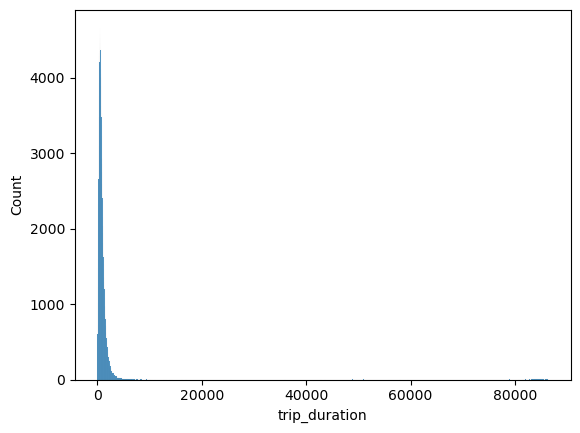

In [11]:
sns.histplot(train["trip_duration"])

<AxesSubplot:xlabel='distance_traveled', ylabel='Density'>

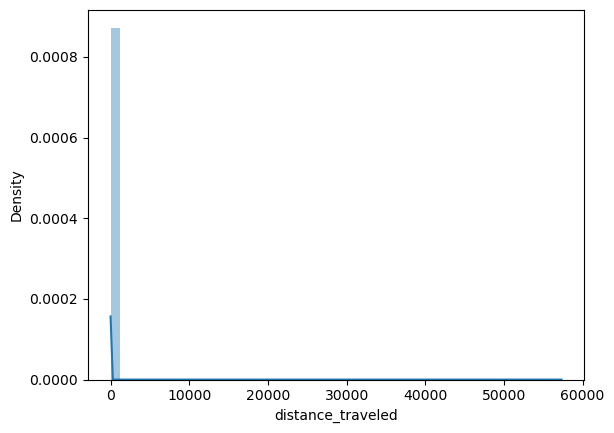

In [12]:
sns.distplot(train["distance_traveled"])

<AxesSubplot:xlabel='fare', ylabel='Density'>

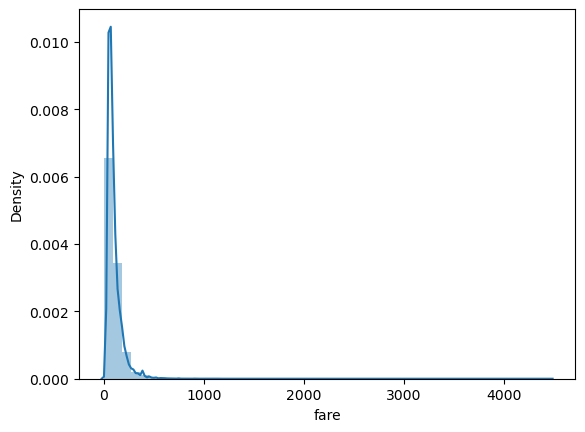

In [13]:
sns.distplot(train["fare"])

<AxesSubplot:xlabel='tip', ylabel='Density'>

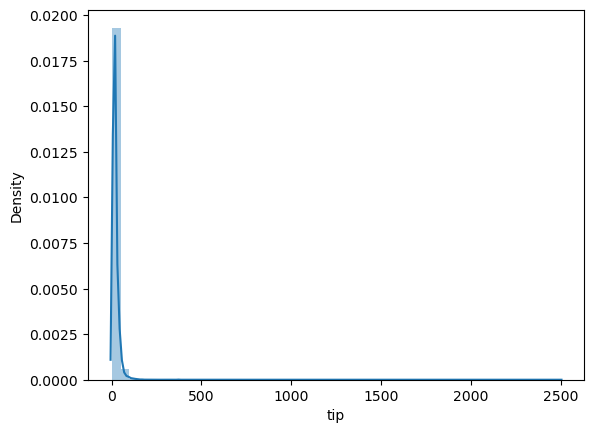

In [14]:
sns.distplot(train["tip"])

<AxesSubplot:xlabel='miscellaneous_fees', ylabel='Density'>

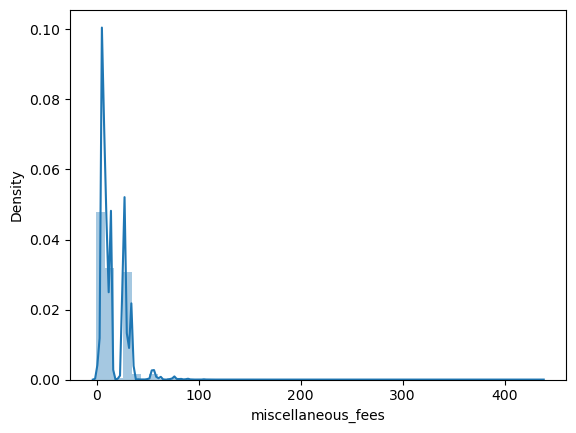

In [15]:
sns.distplot(train["miscellaneous_fees"])

<AxesSubplot:xlabel='total_fare', ylabel='Density'>

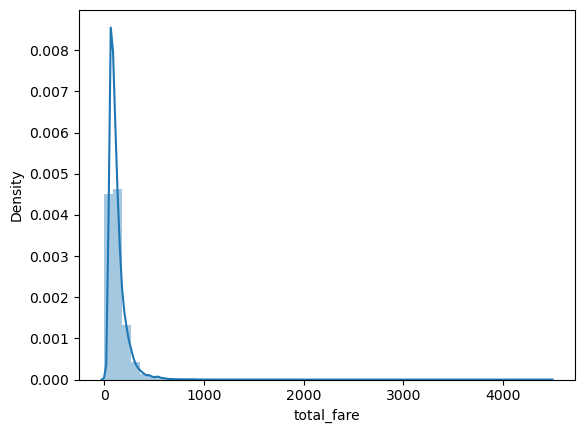

In [16]:
sns.distplot(train["total_fare"])

<AxesSubplot:xlabel='num_of_passengers', ylabel='Density'>

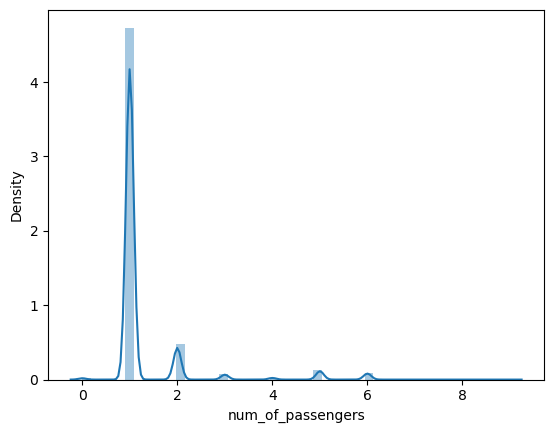

In [17]:
sns.distplot(train["num_of_passengers"])

# Fare is our target variable

        We need to remove total_fare column because it was our final prediction. It was the total of fare(target column), tip, miscellaneous fees. And, we need to remove the tip and miscellaneous fees.

<AxesSubplot:xlabel='trip_duration', ylabel='fare'>

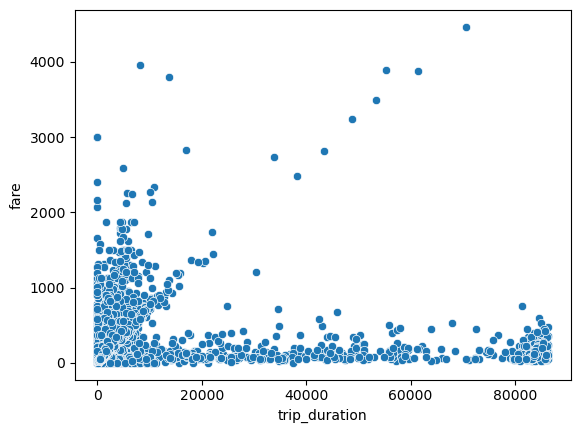

In [18]:
sns.scatterplot(data=train, x="trip_duration", y="fare")

<AxesSubplot:xlabel='distance_traveled', ylabel='fare'>

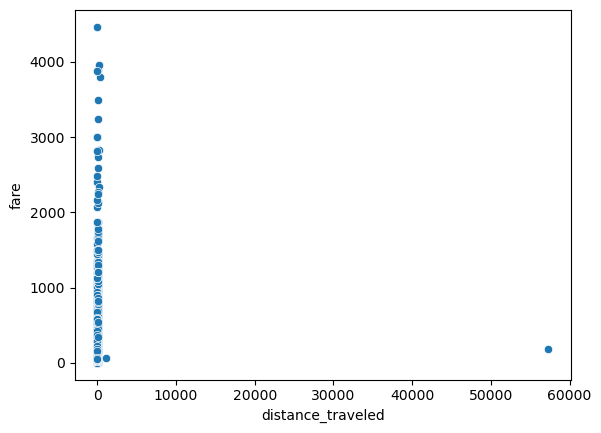

In [19]:
sns.scatterplot(data=train, x="distance_traveled", y="fare")

<AxesSubplot:xlabel='num_of_passengers', ylabel='fare'>

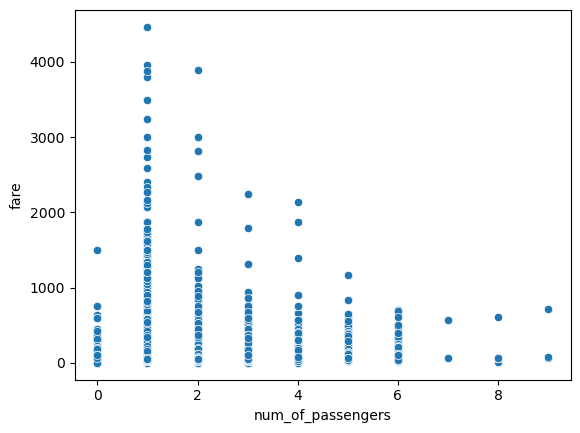

In [20]:
sns.scatterplot(data=train, x="num_of_passengers", y="fare")

<AxesSubplot:xlabel='surge_applied', ylabel='fare'>

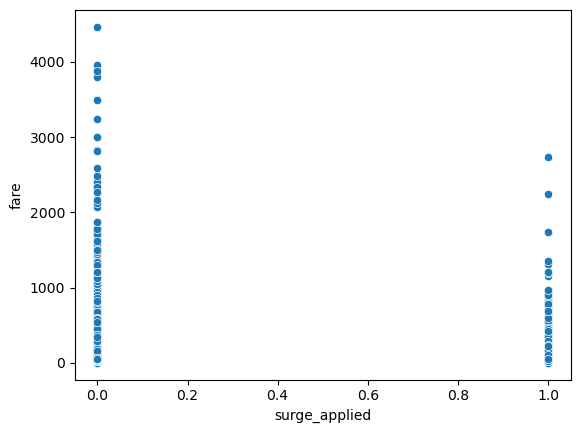

In [21]:
sns.scatterplot(data=train, x="surge_applied", y="fare")

In [22]:
passengers = pd.pivot_table(train, values="fare", index="num_of_passengers", aggfunc=np.sum)
passengers

,fare
num_of_passengers,
0.0,6.835343e+04
1.0,1.735912e+07
2.0,2.053932e+06
3.0,3.078748e+05
4.0,1.080416e+05
5.0,4.609349e+05
6.0,3.075638e+05
7.0,6.202500e+02
8.0,1.992750e+03


In [23]:
surge = pd.pivot_table(train, values="fare", index="surge_applied", aggfunc=np.sum)
surge

,fare
surge_applied,
0,1.363710e+07
1,7.032525e+06


In [24]:
train["surge_applied"].value_counts()

0    146659
1     58689
Name: surge_applied, dtype: int64

In [25]:
train["num_of_passengers"].value_counts()

1.0    174959
2.0     17847
5.0      4712
6.0      3379
3.0      2757
4.0       908
0.0       751
8.0        25
9.0         8
7.0         2
Name: num_of_passengers, dtype: int64

In [26]:
train.corrwith(train["fare"])

trip_duration         0.148904
distance_traveled     0.035740
num_of_passengers     0.009699
fare                  1.000000
tip                   0.297851
miscellaneous_fees    0.294539
total_fare            0.966613
surge_applied         0.140779
dtype: float64

In [27]:
train.drop(train[train["trip_duration"] <= 0].index, inplace=True)
train.drop(train[train["distance_traveled"] <= 0].index, inplace=True)
train.drop(train[train["num_of_passengers"] == 0].index, inplace=True)

In [28]:
train.shape

(204564, 8)

In [29]:
train.describe()

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
count,204564.000000,204564.000000,204564.000000,204564.000000,204564.000000,204564.000000,204564.000000,204564.000000
mean,1190.750484,5.127173,1.303450,100.682715,13.244012,15.288830,129.215557,0.285515
std,4833.326135,126.770049,0.937736,86.115812,20.494954,12.616267,99.232152,0.451660
min,1.000000,0.020000,1.000000,0.000000,0.000000,-0.500000,0.000000,0.000000
25%,454.000000,2.000000,1.000000,52.500000,0.000000,6.000000,73.125000,0.000000
50%,717.000000,3.250000,1.000000,78.750000,9.000000,9.750000,103.500000,0.000000
75%,1110.000000,5.810000,1.000000,116.250000,20.000000,26.525000,153.450000,1.000000
max,86387.000000,57283.910000,9.000000,4466.250000,2500.000000,435.000000,4472.250000,1.000000


In [30]:
y = train["fare"]

In [31]:
X = train.drop("fare", axis=1)
X.head()

,trip_duration,distance_traveled,num_of_passengers,tip,miscellaneous_fees,total_fare,surge_applied
0,748.0,2.75,1.0,24,6.300,105.300,0
1,1187.0,3.43,1.0,24,13.200,142.200,0
2,730.0,3.12,1.0,0,26.625,97.875,1
3,671.0,5.63,3.0,0,9.750,99.750,0
4,329.0,2.09,1.0,12,13.200,70.200,0


In [32]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)
len(X_train), len(y_train), len(X_valid), len(y_valid)

(143194, 143194, 61370, 61370)

In [33]:
X_train_extra = X_train[["tip", "miscellaneous_fees", "total_fare"]]
X_train_extra.head()

,tip,miscellaneous_fees,total_fare
58274,0,6.000,58.500
167274,0,6.000,39.750
110120,0,9.750,51.000
110071,0,6.000,24.750
189487,14,5.875,83.625


In [34]:
X_train.drop(["tip", "miscellaneous_fees", "total_fare"], axis=1, inplace=True)
X_train.head()

,trip_duration,distance_traveled,num_of_passengers,surge_applied
58274,558.0,0.16,1.0,0
167274,230.0,0.48,1.0,0
110120,361.0,1.22,1.0,0
110071,12.0,3.70,1.0,0
189487,674.0,1.77,1.0,0


In [35]:
X_valid_extra = X_valid[["tip", "miscellaneous_fees", "total_fare"]]
X_valid_extra.head()

,tip,miscellaneous_fees,total_fare
160118,0,13.50,69.75
89122,0,13.50,84.75
193809,18,13.95,110.70
82819,38,5.50,126.00
191987,49,30.20,292.95


In [36]:
X_valid.drop(["tip", "miscellaneous_fees", "total_fare"], axis=1, inplace=True)
X_valid.head()

,trip_duration,distance_traveled,num_of_passengers,surge_applied
160118,513.0,2.25,1.0,0
89122,738.0,2.61,2.0,0
193809,869.0,2.77,1.0,0
82819,790.0,3.86,1.0,0
191987,1344.0,15.63,1.0,1


In [37]:
X_train.corrwith(y_train)

trip_duration        0.144351
distance_traveled    0.030465
num_of_passengers    0.009389
surge_applied        0.143025
dtype: float64

# Using Standard Scaler technique

In [38]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scale.fit(X_train)
X_train_scale = scale.transform(X_train)

In [39]:
X_train_scale

array([[-1.30667112e-01, -3.35572344e-02, -3.23106200e-01,
        -6.31215916e-01],
       [-1.97678716e-01, -3.14447542e-02, -3.23106200e-01,
        -6.31215916e-01],
       [-1.70914935e-01, -2.65596437e-02, -3.23106200e-01,
        -6.31215916e-01],
       ...,
       [-1.08806619e-01, -1.31585974e-02, -3.23106200e-01,
        -6.31215916e-01],
       [ 2.70789603e-01,  1.50298103e-02, -3.23106200e-01,
        -6.31215916e-01],
       [ 9.99917334e-02,  1.49673401e-03,  3.95917802e+00,
        -6.31215916e-01]])

In [40]:
X_valid_scale = scale.transform(X_valid)
X_valid_scale

array([[-0.13986078, -0.0197601 , -0.3231062 , -0.63121592],
       [-0.09389245, -0.01738356,  0.74746485, -0.63121592],
       [-0.06712867, -0.01632732, -0.3231062 , -0.63121592],
       ...,
       [-0.0967527 , -0.00325635, -0.3231062 , -0.63121592],
       [-0.17071063, -0.0307846 , -0.3231062 , -0.63121592],
       [-0.13393597,  0.01021071,  0.74746485, -0.63121592]])

# Building a model

In [41]:
model_1 = LinearRegression()
model_1.fit(X_train_scale, y_train)
model_1_pred = model_1.predict(X_valid_scale)

In [42]:
model_1_mae = mean_absolute_error(y_valid, model_1_pred)
model_1_mae

48.455158315655126

In [43]:
model_1_mse = mean_squared_error(y_valid, model_1_pred)
model_1_mse

7354.979891527442

In [44]:
model_2 = DecisionTreeRegressor()
model_2.fit(X_train_scale, y_train)
model_2_pred = model_2.predict(X_valid_scale)

In [45]:
model_2_mae = mean_absolute_error(y_valid, model_2_pred)
model_2_mae

11.10616782377771

In [46]:
model_2_mse = mean_squared_error(y_valid, model_2_pred)
model_2_mse

3574.0300656423165

In [47]:
model_3 = RandomForestRegressor()
model_3.fit(X_train_scale, y_train)
model_3_pred = model_3.predict(X_valid_scale)

In [48]:
model_3_mae = mean_absolute_error(y_valid, model_3_pred)
model_3_mae

9.462100141096219

In [49]:
model_3_mse = mean_squared_error(y_valid, model_3_pred)
model_3_mse

2321.503455439756

In [50]:
model_4 = XGBRegressor()
model_4.fit(X_train_scale, y_train)
model_4_pred = model_4.predict(X_valid_scale)

In [51]:
model_4_mae = mean_absolute_error(y_valid, model_4_pred)
model_4_mae

8.53974849664419

In [52]:
model_4_mse = mean_squared_error(y_valid, model_4_pred)
model_4_mse

2212.182464521959

In [53]:
model_5 = Lasso()
model_5.fit(X_train_scale, y_train)
model_5_pred = model_5.predict(X_valid_scale)

In [54]:
model_5_mae = mean_absolute_error(y_valid, model_5_pred)
model_5_mae

48.612031367438654

In [55]:
model_5_mse = mean_squared_error(y_valid, model_5_pred)
model_5_mse

7365.77124270253

In [56]:
total_fare = model_4_pred + np.array(X_valid_extra["tip"]) + np.array(X_valid_extra["miscellaneous_fees"])
total_fare

array([ 70.37184143,  86.44921875, 111.52805634, ..., 117.15664978,
        44.26441574, 128.34778595])

In [57]:
mean_absolute_error(y_valid, total_fare)

33.987344829579

In [58]:
mean_squared_error(y_valid, total_fare)

3666.481490041002

# Model For Prediction 

In [59]:
test_extra = test[["tip", "total_fare", "fare", "miscellaneous_fees"]]

In [60]:
test.drop(["tip", "total_fare", "fare", "miscellaneous_fees"], axis=1, inplace=True)

In [61]:
test.head()

,trip_duration,distance_traveled,num_of_passengers,surge_applied
0,1076.0,4.18,1.0,0
1,429.0,1.48,4.0,0
2,856.0,4.15,1.0,0
3,622.0,3.22,1.0,0
4,507.0,3.98,1.0,0


In [62]:
test.describe()

,trip_duration,distance_traveled,num_of_passengers,surge_applied
count,89861.000000,89861.000000,89861.000000,89861.000000
mean,1148.178164,7.263529,1.286732,0.282280
std,4611.480867,554.965869,0.920910,0.450112
min,0.000000,0.020000,0.000000,0.000000
25%,446.000000,1.950000,1.000000,0.000000
50%,705.000000,3.200000,1.000000,0.000000
75%,1094.000000,5.730000,1.000000,1.000000
max,86395.000000,145517.600000,9.000000,1.000000


In [63]:
test["trip_duration"] = np.where(test["trip_duration"]>0, test["trip_duration"], 1)

In [64]:
test["trip_duration"] = np.where(test["trip_duration"]>=86387, 86387, test["trip_duration"])

In [66]:
test["distance_traveled"] = np.where(test["distance_traveled"]>0, test["distance_traveled"], 0.02)
test["distance_traveled"] = np.where(test["distance_traveled"]>=57283.9, 57283.9, test["distance_traveled"])

In [67]:
test["num_of_passengers"] = np.where(test["num_of_passengers"]>0, test["num_of_passengers"], 1)
test["num_of_passengers"] = np.where(test["num_of_passengers"]>=9, 9, test["num_of_passengers"])

In [68]:
test.describe()

,trip_duration,distance_traveled,num_of_passengers,surge_applied
count,89861.000000,89861.000000,89861.000000,89861.000000
mean,1148.178164,6.021861,1.290916,0.282280
std,4611.478365,270.269695,0.917319,0.450112
min,1.000000,0.020000,1.000000,0.000000
25%,446.000000,1.950000,1.000000,0.000000
50%,705.000000,3.200000,1.000000,0.000000
75%,1094.000000,5.730000,1.000000,1.000000
max,86387.000000,57283.900000,9.000000,1.000000


In [69]:
test_scale = scale.transform(test)

In [70]:
test_pred_fare = model_4.predict(test_scale)

In [71]:
total_fare = np.abs(test_pred_fare) + np.array(test_extra["tip"]) + np.array(test_extra["miscellaneous_fees"])
total_fare

array([110.93753815,  67.89492798, 118.88218689, ...,  80.65317917,
       144.89208527,  94.64051514])

In [72]:
total_fare_df = pd.DataFrame({"total_fare" : total_fare})
total_fare_df.head(15)

,total_fare
0,110.937538
1,67.894928
2,118.882187
3,91.153709
4,74.365303
5,174.948120
6,53.171881
7,81.795135
8,99.615875
9,174.579666


In [73]:
total_fare_df.to_csv("total_fare.csv", index=False)

In [74]:
np.mean(train["total_fare"]), np.mean(total_fare)

(129.21555735603272, 127.54279104545152)

In [75]:
total_fare_df[total_fare_df["total_fare"]<0]

,total_fare
